## Linear Regression Assignment

Build a model for predection of bike rental daily count base on th environmental and seasonal settings

### STEPS

 - Importing python packages
 - Reading, undertanding and visualize the data
 - Preparing Data
 - Training the model
 - Residual analisys
 - Predictions and evaluations on the test set

#### Step 0 - importing python packages and modules required for the creation of the model

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(np.__version__)
print(pd.__version__)
#print(matplotlib.pyplot.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(sm.__version__)


1.20.3
1.3.4
0.11.2
0.24.2
0.12.2


#### Step 1 - Reading, understanding and visualizing the data

In [100]:
#Reading the data set
bikerenting =  pd.read_csv("day.csv")
#Checking some of the records
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
#only 2018
bikerenting = bikerenting[bikerenting['yr']==0]

In [103]:
#Data set structure
bikerenting.shape

(365, 16)

In [104]:
#Search for missing values
#rule : if 30% is null we should ignore the variable
bikerenting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     365 non-null    int64  
 1   dteday      365 non-null    object 
 2   season      365 non-null    int64  
 3   yr          365 non-null    int64  
 4   mnth        365 non-null    int64  
 5   holiday     365 non-null    int64  
 6   weekday     365 non-null    int64  
 7   workingday  365 non-null    int64  
 8   weathersit  365 non-null    int64  
 9   temp        365 non-null    float64
 10  atemp       365 non-null    float64
 11  hum         365 non-null    float64
 12  windspeed   365 non-null    float64
 13  casual      365 non-null    int64  
 14  registered  365 non-null    int64  
 15  cnt         365 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 48.5+ KB


In [105]:
bikerenting.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,0.0,6.526027,0.027397,3.008219,0.684932,1.421918,19.953263,23.341767,64.366477,12.823977,677.402740,2728.358904,3405.761644
std,105.510663,1.110946,0.0,3.452584,0.163462,2.006155,0.465181,0.571831,7.773418,8.441778,14.874398,5.151637,556.269121,1060.110413,1378.753666
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,92.000000,2.000000,0.0,4.000000,0.000000,1.000000,0.000000,1.000000,13.325000,16.097700,53.833300,9.084061,222.000000,1730.000000,2132.000000
50%,183.000000,3.000000,0.0,7.000000,0.000000,3.000000,1.000000,1.000000,19.645847,23.642300,64.750000,12.522300,614.000000,2915.000000,3740.000000
75%,274.000000,3.000000,0.0,10.000000,0.000000,5.000000,1.000000,2.000000,26.923347,30.618950,74.208300,15.750025,871.000000,3632.000000,4586.000000
max,365.000000,4.000000,0.0,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3065.000000,4614.000000,6043.000000


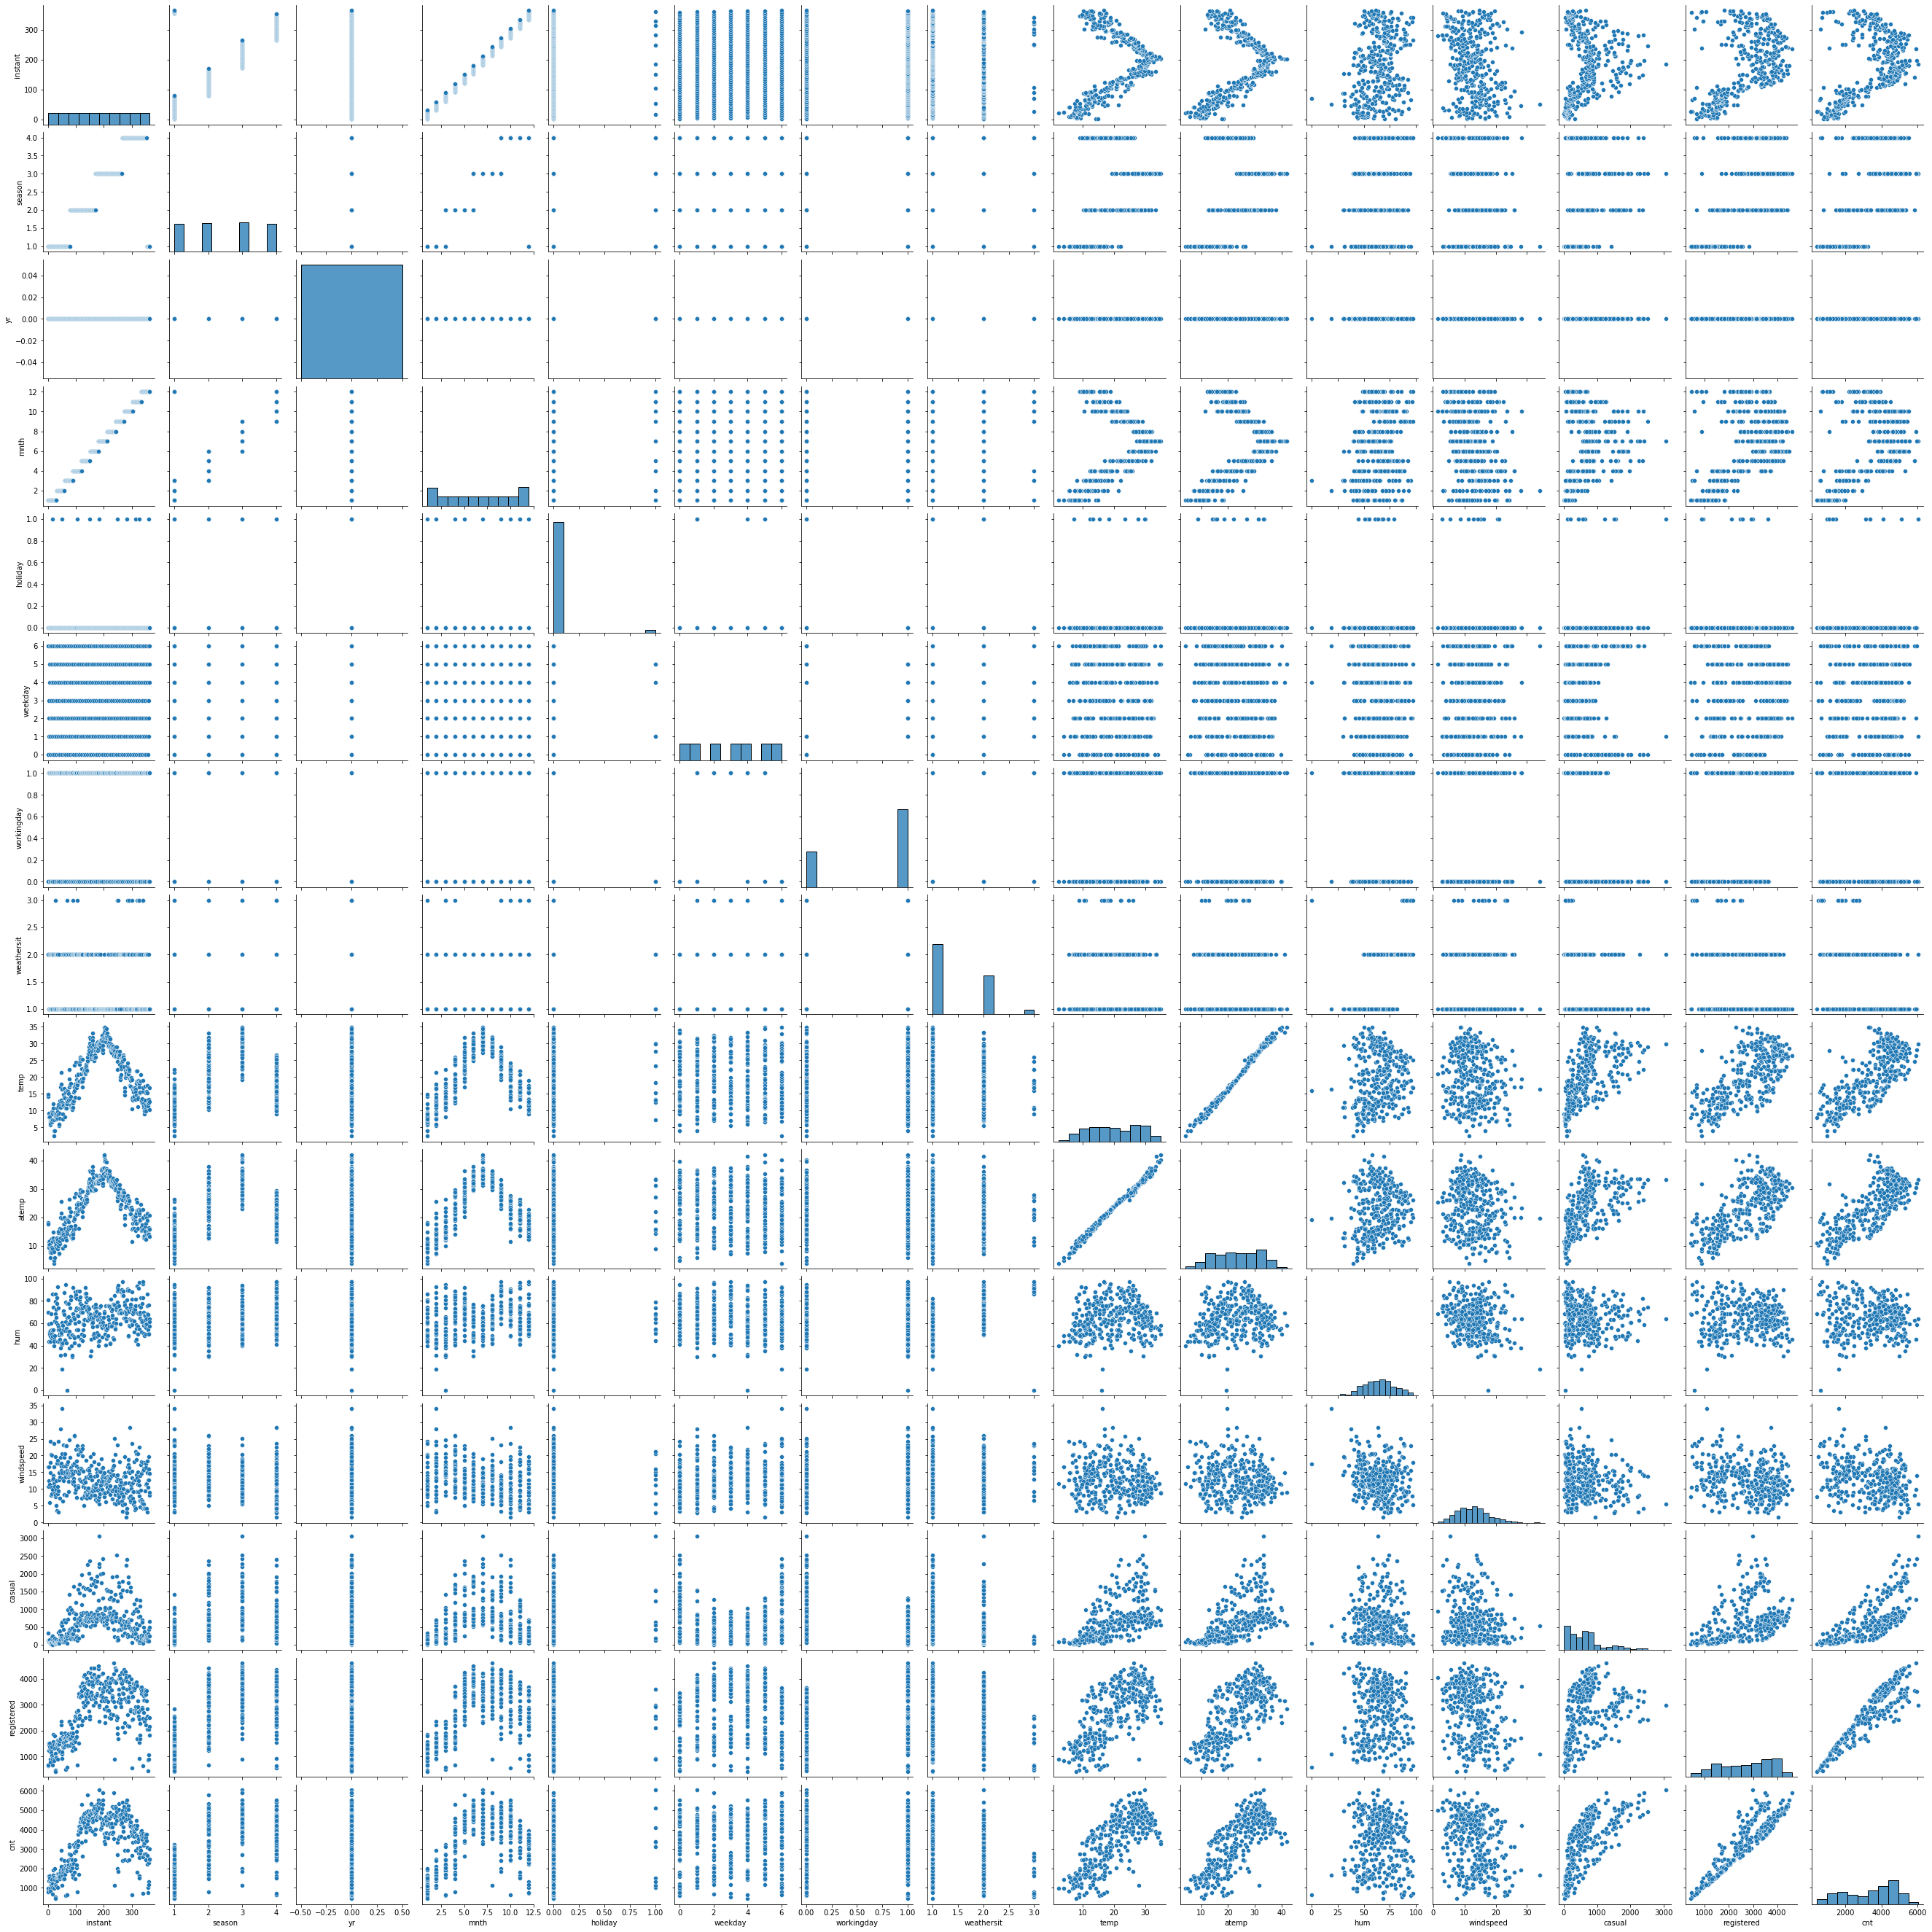

In [106]:
#Lets visualize the data
sns.pairplot(bikerenting)
plt.show()

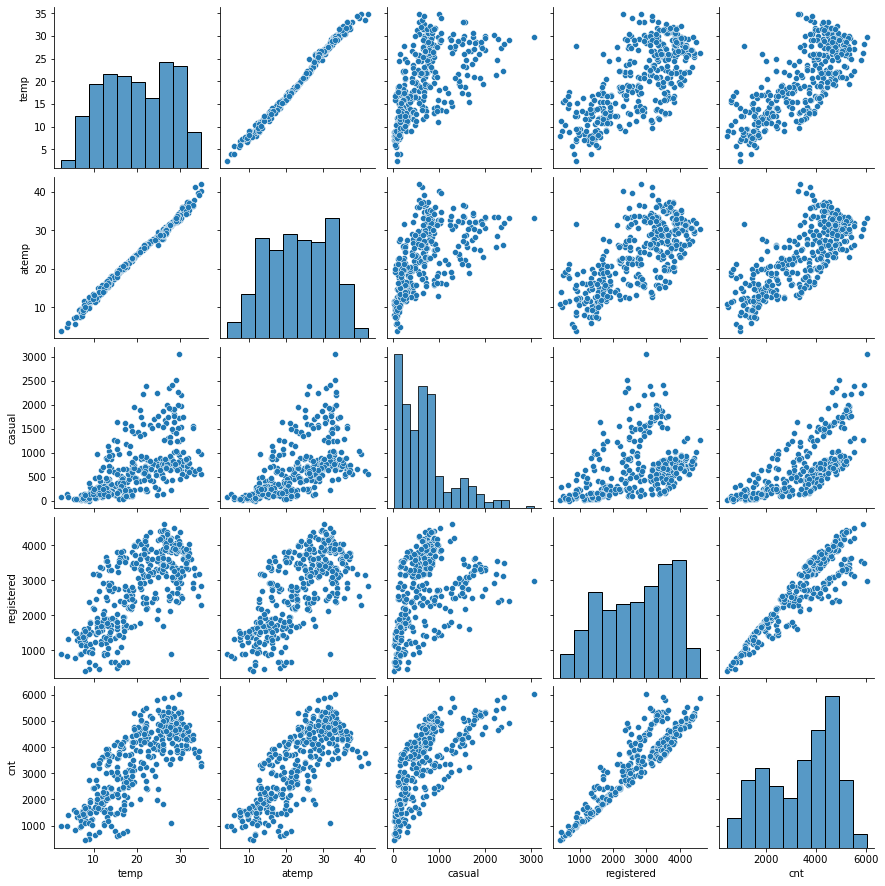

In [107]:
# there seems to be a positive correlation bettween the temperature and the number of rentals (either registered or casual)
sns.pairplot(bikerenting[['temp','atemp','casual','registered','cnt']])
plt.show()

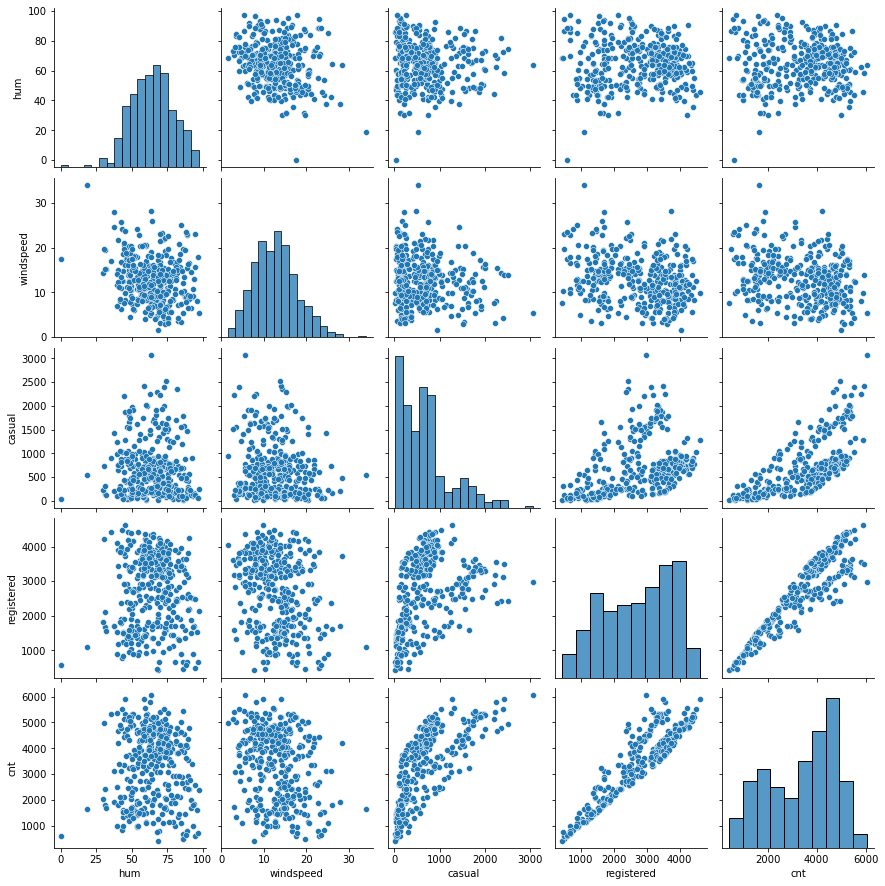

In [108]:
# it seems there isn't a relation between wind or humidity and number of rentals (either registered or casual)
sns.pairplot(bikerenting[['hum','windspeed','casual','registered','cnt']])
plt.show()

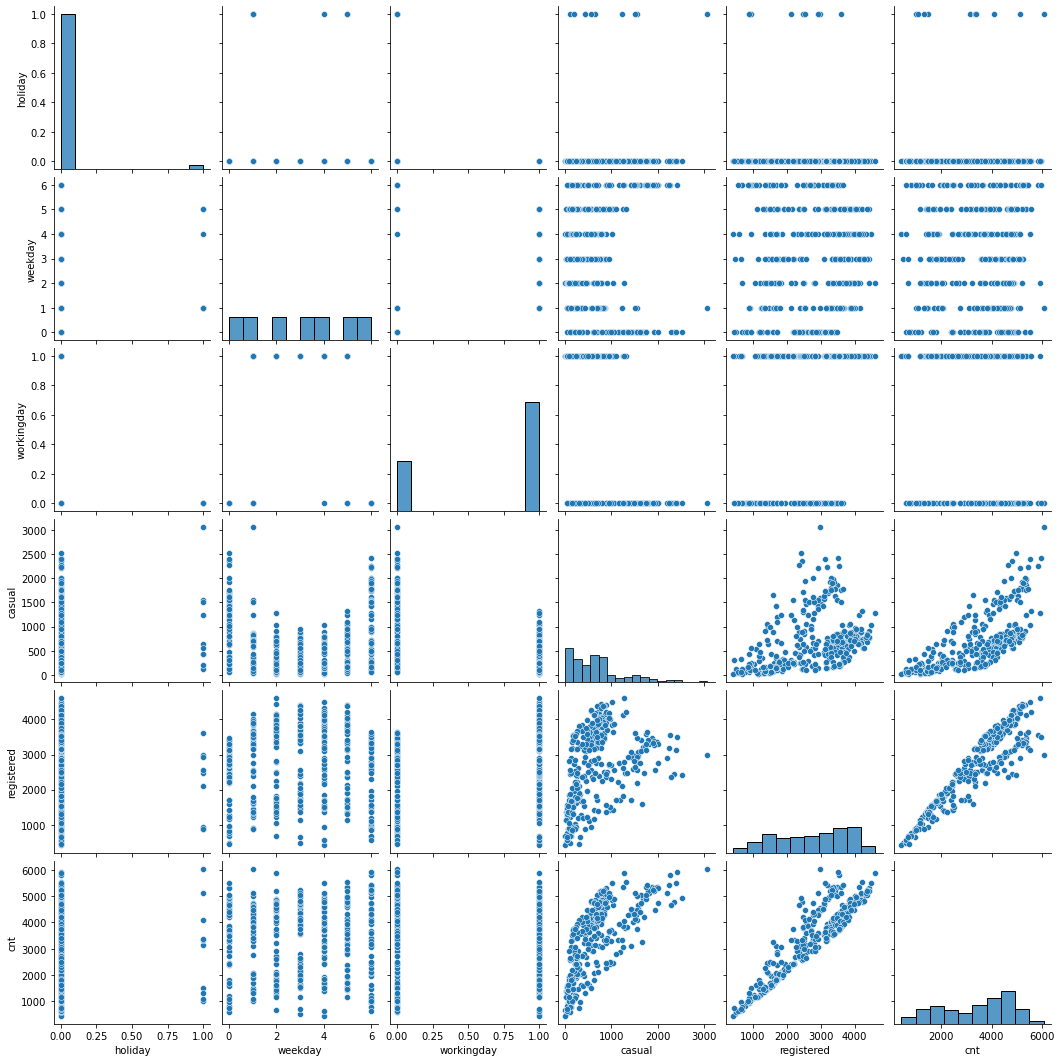

In [109]:
# The day of the week also seems to have some impact on the number of rentals
sns.pairplot(bikerenting[['holiday','weekday','workingday','casual','registered','cnt']])
plt.show()
#Because these are categorial variables we need use a diferent visualization

In [110]:
#visualize categorical variables

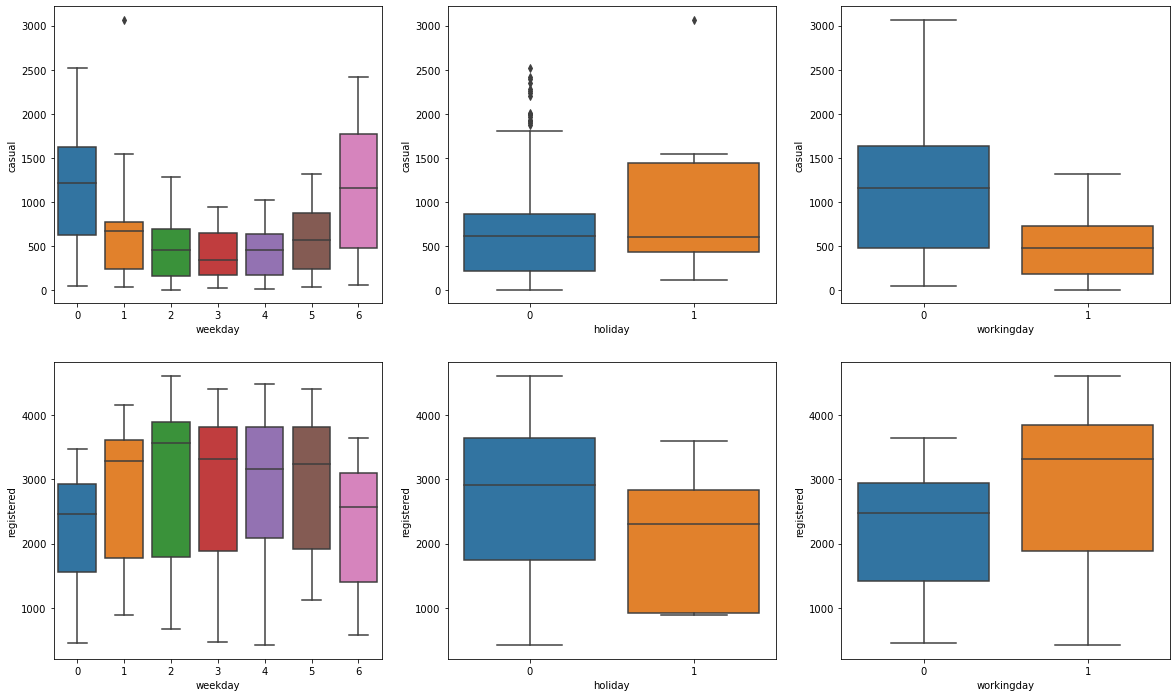

In [111]:
# Looking at the histograms bellow its clear that
# 1 - Registered users have less rentals on holidays while Causal users have more rentals on holidays
# 2 - Registered users have more rentals on working days  while Causal users have less rentals on working days

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='weekday', y='casual', data=bikerenting)
plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='casual', data=bikerenting)
plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='casual', data=bikerenting)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='registered', data=bikerenting)
plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='registered', data=bikerenting)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='registered', data=bikerenting)
plt.show()

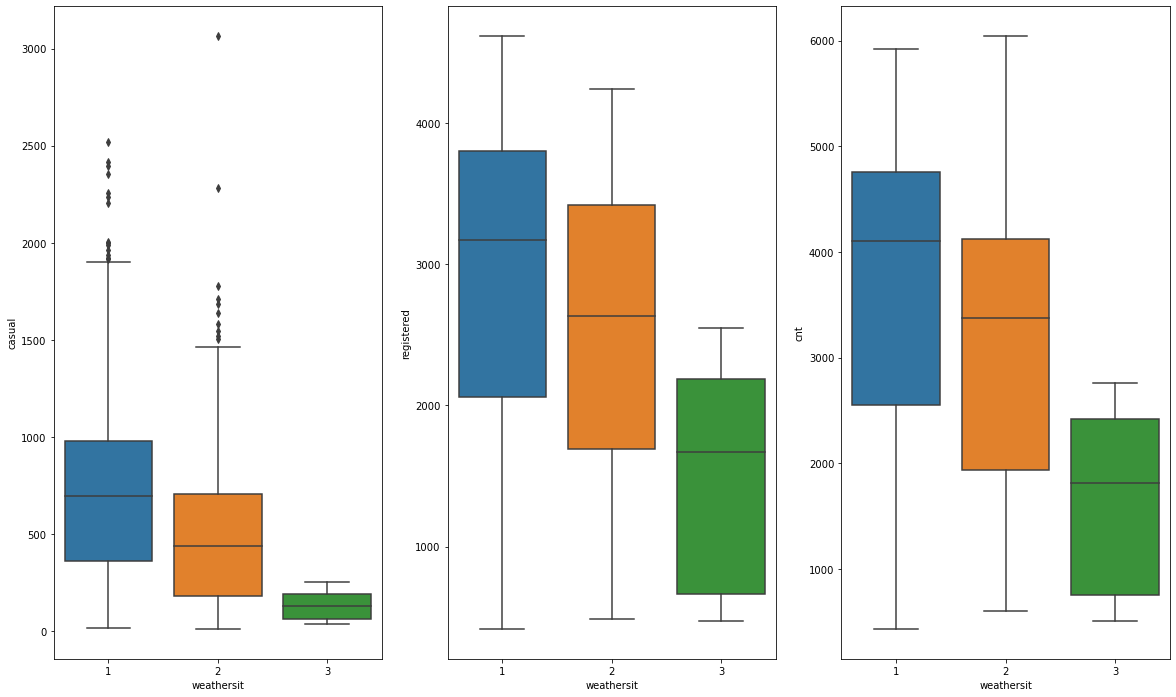

In [112]:
# Weather conditions seem to affect causal and registered users, if weather conditions deteriorate the number of rentals reduces.
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='weathersit', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bikerenting)
plt.show()

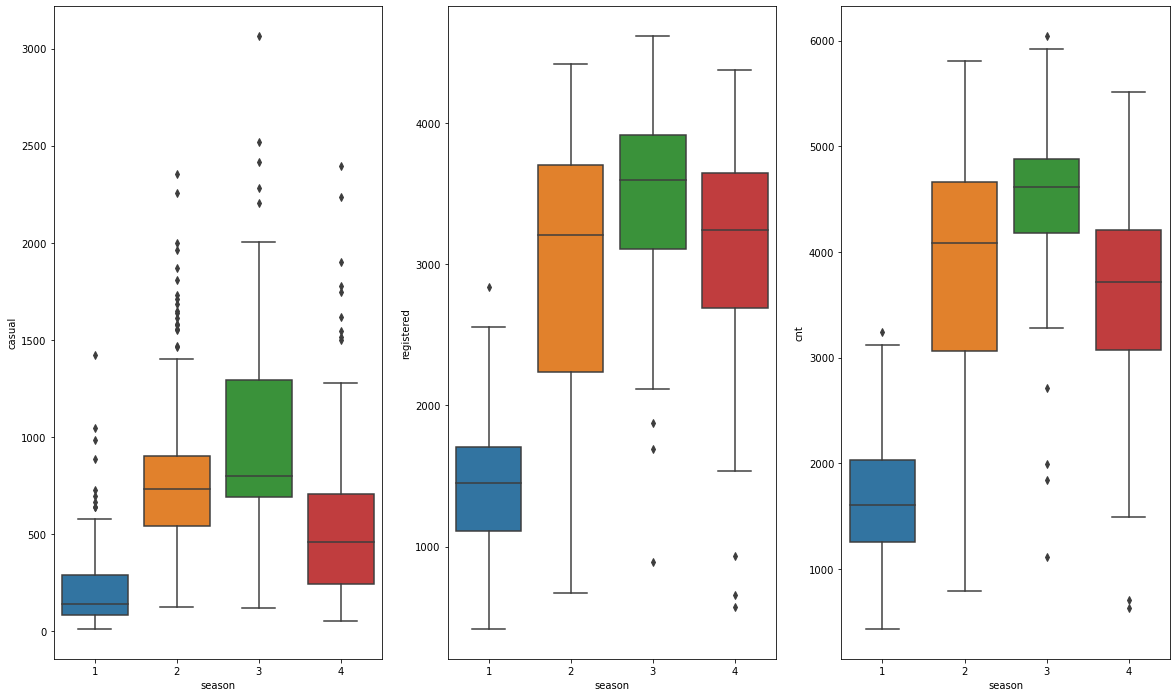

In [113]:
# Season also seems to have some influence on rentals: summer and fall have more rentals than spring and winter.
# Causal rentals occur evenly on summer and fall
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='season', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='season', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='season', y='cnt', data=bikerenting)
plt.show()

<AxesSubplot:xlabel='yr', ylabel='cnt'>

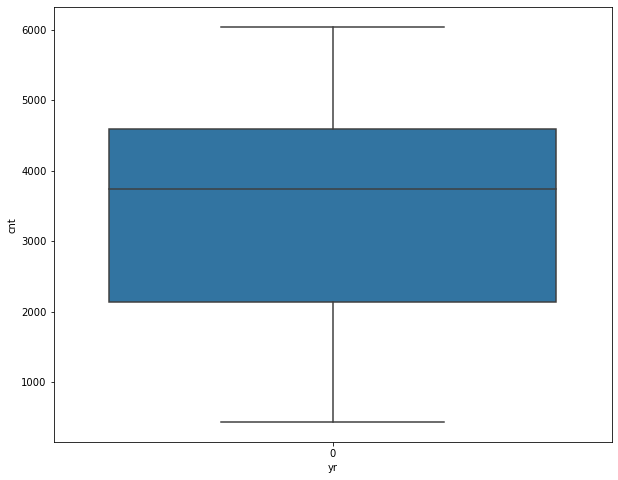

In [114]:
#Rentals are increasing from year 2018 to 2019, but is suficient storical data
plt.figure(figsize=(10,8))
sns.boxplot(x='yr', y='cnt', data=bikerenting)

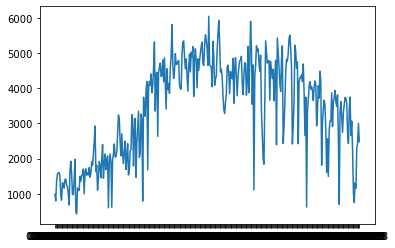

In [115]:
# based on the line chart bellow we do see a decrease at the end of 2019 so we cannot conclude there is a correlation betwee date
# and number of rentals
plt.plot(bikerenting['dteday'], bikerenting['cnt'])
plt.show()

#### Step 2 - Preparing data for modeling
 - encondig
 - spliting into train and test
 - rescaling

##### Step 2 - Encoding

In [116]:
# yes and no values are already converted to 0 and 1 at the data source ('day.csv')

In [117]:
# Variables "yr", "holiday" and "workingday" only had 2 possible values and are already handled correctly

In [118]:
# Dummmy variables - weathersit
weathersit = pd.get_dummies(bikerenting['weathersit'])
weathersit.columns = ['Sun', 'Clouds', 'Rain']
weathersit

,Sun,Clouds,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
360,0,1,0
361,1,0,0
362,1,0,0
363,1,0,0


In [119]:
# change 3 dummy collumns to 2 collumns. Why using 3 if we can use 2
#droping redundant dummy bar
weathersit = pd.get_dummies(bikerenting['weathersit'],drop_first=True)
weathersit.columns = ['clouds', 'rain']
weathersit.head()

,clouds,rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [120]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,weathersit], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [121]:
#lets remove weathersit
bikerenting = bikerenting.drop('weathersit', axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [122]:
# Dummmy variables - season
season = pd.get_dummies(bikerenting['season'])
season.columns = ['spring', 'summer', 'fall','winter']
season.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [123]:
# change 4 dummy collumns to 3 collumns. Why using 4 if we can use 3
#droping redundant dummy bar
season = pd.get_dummies(bikerenting['season'],drop_first=True)
season.columns = ['summer', 'fall','winter']
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [124]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,season], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [125]:
#lets remove season
bikerenting = bikerenting.drop('season', axis=1)
bikerenting.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [126]:
#We can drop weekday, year,month,instant, dteday
#lets remove season
bikerenting = bikerenting.drop('yr', axis=1)
bikerenting = bikerenting.drop('mnth', axis=1)
bikerenting = bikerenting.drop('weekday', axis=1)
bikerenting = bikerenting.drop('instant', axis=1)
bikerenting = bikerenting.drop('dteday', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [127]:
# lets drop registered and causals since the study is the target variable "cnt"
bikerenting = bikerenting.drop('casual', axis=1)
bikerenting = bikerenting.drop('registered', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


##### Step 2 - split data into train and test

In [128]:
bikerenting_train, bikerenting_test = train_test_split(bikerenting,train_size = 0.7,random_state=100)
print(bikerenting_train.shape)
print(bikerenting_test.shape)

(255, 12)
(110, 12)


##### Step 2 - rescale

In [129]:
# There are very diferent values, for exmeple "temp" and "causal", we should rescale
# we want all variable to be at comparable scales, for interpretability reasosn
# if we use min max we compress the data between 0 and 1 
scaler = MinMaxScaler()

# we only want to scale numerical
# create list of only numerical lables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#fit data
# there are 3 types
# fit() learns xmin and xmax
# transform()
# fit_transform() does both

bikerenting_train[num_vars] = scaler.fit_transform(bikerenting_train[num_vars])
bikerenting_train.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
326,0,1,0.457976,0.446998,0.779349,0.646159,0.372043,1,0,0,0,1
10,0,1,0.096526,0.124822,0.705773,0.205620,0.136717,1,0,0,0,0
174,0,1,0.834844,0.751619,0.589546,0.411555,0.810005,0,0,0,1,0
118,0,1,0.549976,0.537188,0.470008,0.448741,0.738487,0,0,1,0,0
242,0,1,0.745061,0.690354,0.614825,0.125634,0.822106,0,0,0,1,0


##### Step 3 - Training the model

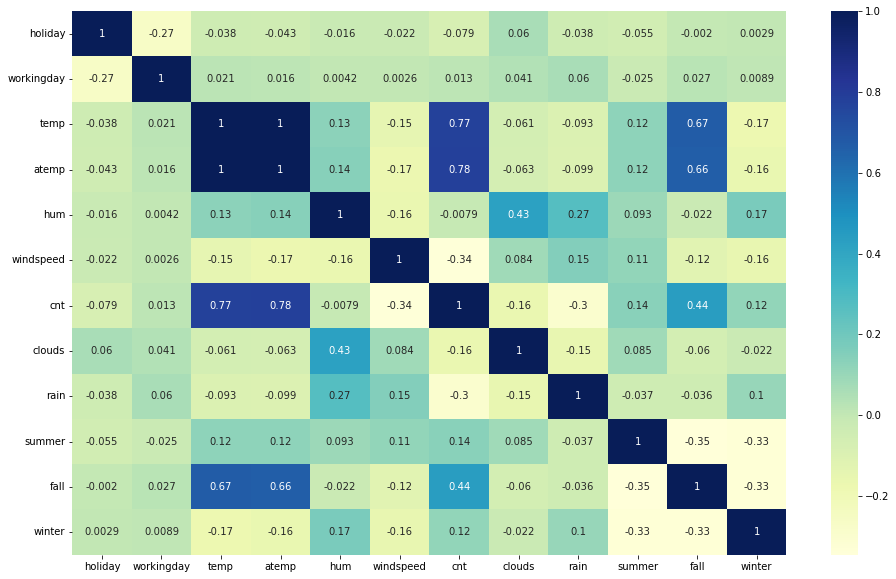

In [130]:
# lets draw heat map
# it will teal us that there is a coorelation between temperature and rentals like we suspected from the data visualization
plt.figure(figsize= (16,10))
sns.heatmap(bikerenting_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [131]:
# we need to separate the X from Y
y_train = bikerenting_train.pop('cnt')
y_train.head()


326    0.372043
10     0.136717
174    0.810005
118    0.738487
242    0.822106
Name: cnt, dtype: float64

In [132]:
X_train = bikerenting_train
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
326,0,1,0.457976,0.446998,0.779349,0.646159,1,0,0,0,1
10,0,1,0.096526,0.124822,0.705773,0.205620,1,0,0,0,0
174,0,1,0.834844,0.751619,0.589546,0.411555,0,0,0,1,0
118,0,1,0.549976,0.537188,0.470008,0.448741,0,0,1,0,0
242,0,1,0.745061,0.690354,0.614825,0.125634,0,0,0,1,0


In [133]:
# we need to check statistical significant of variables
# if independent variables (predictors) are correlated we need to rmeove them form the model, because they don't add value to it.
# we could go variable by variable or qe can do it in one action
# buil model with all variables
X_train_sm = sm.add_constant(X_train)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.298434
holiday      -0.066847
workingday    0.002252
temp          0.606820
atemp         0.018160
hum          -0.172572
windspeed    -0.254426
clouds       -0.054939
rain         -0.279418
summer        0.177226
fall          0.136388
winter        0.245098
dtype: float64

In [134]:
#lets determine p values. p values above 0.5 are significant
# we will see that temperature is significant
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     95.20
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.61e-81
Time:                        21:19:41   Log-Likelihood:                 202.90
No. Observations:                 255   AIC:                            -381.8
Df Residuals:                     243   BIC:                            -339.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2984      0.047      6.297      0.000       0.205       0.392
holiday       -0.0668      0.042     -1.587      0.114      -0.150       0.016
workingday     0.0023      0.016      0.142      0.887      -0.029       0.033
temp           0.6068      0.347      1.750      0.081      -0.076       1.290
atemp          0.0182      0.378      0.048      0.962      -0.726       0.762
hum           -0.1726      0.061     -2.842      0.005      -0.292      -0.053
windspeed     -0.2544      0.048     -5.325      0.000      -0.349      -0.160
clouds        -0.0549      0.018     -3.003      0.003      -0.091      -0.019
rain          -0.2794      0.040     -6.905      0.000      -0.359      -0.200
summer         0.1772      0.026      6.805      0.000       0.126       0.229
fall           0.1364      0.035      3.895      0.000       0.067       0.205
winter         0.2451      0.023     10.522      0.000       0.199       0.291
==============================================================================
Omnibus:                       20.731   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.908
Skew:                          -0.491   Prob(JB):                     4.33e-08
Kurtosis:                       4.492   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,atemp,808.08
2,temp,772.41
4,hum,16.11
9,fall,6.37
5,windspeed,4.41
8,summer,3.57
1,workingday,3.20
10,winter,2.69
6,clouds,2.06
7,rain,1.29


In [136]:
# what collumn should we drop? 

## high p-value and high VIF »»» Drop
## high p-value and low VIF »»» remove these first
## low p-value and high VIF »»» remove these after
## low p-value and low VIF »»» we keep

# what collumn should we drop? "atemp" that has big p value or "temp" with VIF very high?

# we should remove "atemp"
X = X_train.drop('atemp',axis=1)

In [137]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.299001
holiday      -0.067009
workingday    0.002206
temp          0.623316
hum          -0.172337
windspeed    -0.254950
clouds       -0.054984
rain         -0.279555
summer        0.177194
fall          0.136197
winter        0.245158
dtype: float64

In [138]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     105.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.53e-82
Time:                        21:19:45   Log-Likelihood:                 202.90
No. Observations:                 255   AIC:                            -383.8
Df Residuals:                     244   BIC:                            -344.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2990      0.046      6.527      0.000       0.209       0.389
holiday       -0.0670      0.042     -1.599      0.111      -0.150       0.016
workingday     0.0022      0.016      0.140      0.889      -0.029       0.033
temp           0.6233      0.052     12.087      0.000       0.522       0.725
hum           -0.1723      0.060     -2.853      0.005      -0.291      -0.053
windspeed     -0.2549      0.046     -5.491      0.000      -0.346      -0.163
clouds        -0.0550      0.018     -3.016      0.003      -0.091      -0.019
rain          -0.2796      0.040     -6.939      0.000      -0.359      -0.200
summer         0.1772      0.026      6.820      0.000       0.126       0.228
fall           0.1362      0.035      3.923      0.000       0.068       0.205
winter         0.2452      0.023     10.561      0.000       0.199       0.291
==============================================================================
Omnibus:                       20.657   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.808
Skew:                          -0.489   Prob(JB):                     4.56e-08
Kurtosis:                       4.492   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,17.63
3,hum,13.57
8,fall,6.28
4,windspeed,4.37
7,summer,3.57
1,workingday,3.20
9,winter,2.68
5,clouds,2.02
6,rain,1.26
0,holiday,1.10


In [140]:
# we should remove "fall"
X = X.drop('fall',axis=1)

In [141]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.293737
holiday      -0.070141
workingday    0.001433
temp          0.787087
hum          -0.186043
windspeed    -0.269973
clouds       -0.048747
rain         -0.258156
summer        0.101303
winter        0.188785
dtype: float64

In [142]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.34e-80
Time:                        21:19:50   Log-Likelihood:                 195.10
No. Observations:                 255   AIC:                            -370.2
Df Residuals:                     245   BIC:                            -334.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2937      0.047      6.235      0.000       0.201       0.387
holiday       -0.0701      0.043     -1.627      0.105      -0.155       0.015
workingday     0.0014      0.016      0.088      0.930      -0.030       0.033
temp           0.7871      0.031     25.271      0.000       0.726       0.848
hum           -0.1860      0.062     -2.999      0.003      -0.308      -0.064
windspeed     -0.2700      0.048     -5.671      0.000      -0.364      -0.176
clouds        -0.0487      0.019     -2.608      0.010      -0.086      -0.012
rain          -0.2582      0.041     -6.286      0.000      -0.339      -0.177
summer         0.1013      0.018      5.677      0.000       0.066       0.136
winter         0.1888      0.019     10.065      0.000       0.152       0.226
==============================================================================
Omnibus:                       16.140   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.212
Skew:                          -0.305   Prob(JB):                     1.01e-07
Kurtosis:                       4.631   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,hum,13.35
2,temp,5.92
4,windspeed,4.30
1,workingday,3.20
5,clouds,2.00
8,winter,1.65
7,summer,1.59
6,rain,1.23
0,holiday,1.10


In [144]:
# we should remove "hum"
X = X.drop('hum',axis=1)

In [145]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.183416
holiday      -0.063964
workingday    0.004623
temp          0.766319
windspeed    -0.230818
clouds       -0.079614
rain         -0.312801
summer        0.093127
winter        0.176646
dtype: float64

In [146]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.67e-79
Time:                        21:19:53   Log-Likelihood:                 190.50
No. Observations:                 255   AIC:                            -363.0
Df Residuals:                     246   BIC:                            -331.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1834      0.030      6.134      0.000       0.125       0.242
holiday       -0.0640      0.044     -1.462      0.145      -0.150       0.022
workingday     0.0046      0.016      0.281      0.779      -0.028       0.037
temp           0.7663      0.031     24.836      0.000       0.706       0.827
windspeed     -0.2308      0.047     -4.961      0.000      -0.322      -0.139
clouds        -0.0796      0.016     -5.023      0.000      -0.111      -0.048
rain          -0.3128      0.037     -8.364      0.000      -0.386      -0.239
summer         0.0931      0.018      5.197      0.000       0.058       0.128
winter         0.1766      0.019      9.492      0.000       0.140       0.213
==============================================================================
Omnibus:                       18.185   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.633
Skew:                          -0.288   Prob(JB):                     5.53e-10
Kurtosis:                       4.918   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,windspeed,3.69
2,temp,3.44
1,workingday,2.98
4,clouds,1.58
6,summer,1.53
7,winter,1.36
5,rain,1.13
0,holiday,1.09


In [148]:
# VIF values are now bellow 5 and p values are low we have our model.

#### Step 4 - residual analisys

In [149]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

326    0.486883
10     0.134935
174    0.732803
118    0.599046
242    0.729995
         ...   
343    0.441664
359    0.245723
323    0.576511
280    0.782462
8      0.064458
Length: 255, dtype: float64

C:\Users\SergioFontes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

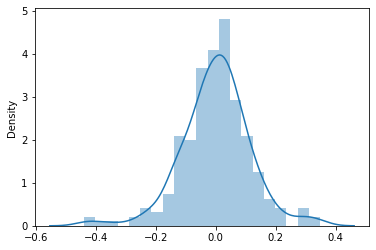

In [150]:
# let see if error distribution is normal and centered on zero
res = y_train - y_train_pred
sns.distplot(res)

### Step 5 - Predictions and Evaluation

In [151]:
# we never fit on the test set (only the training)
# we transform the training set 

num_vars = ['temp','atemp','hum','windspeed','cnt']
bikerenting_test[num_vars] = scaler.transform(bikerenting_test[num_vars])
bikerenting_test.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
147,0,0,0.743952,0.692049,0.750214,0.428185,0.767925,0,0,1,0,0
125,0,1,0.508965,0.505727,0.606684,0.424379,0.740834,0,0,1,0,0
314,1,0,0.302796,0.280272,0.458869,0.602557,0.516886,0,0,0,0,1
56,0,0,0.247374,0.247087,0.553128,0.338464,0.264223,0,0,0,0,0
241,0,1,0.721784,0.668230,0.563839,0.211549,0.848474,0,0,0,1,0


In [152]:
bikerenting_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.018182,0.681818,0.515024,0.493259,0.664983,0.337903,0.512652,0.336364,0.036364,0.236364,0.263636,0.245455
std,0.134220,0.467902,0.265251,0.238928,0.151986,0.141478,0.242447,0.474627,0.188050,0.426792,0.442621,0.432326
min,0.000000,0.000000,-0.049735,-0.026641,0.323237,0.057698,-0.013545,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.295241,0.298557,0.538132,0.230127,0.301607,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.485133,0.480611,0.658312,0.341659,0.568449,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.748109,0.690561,0.777635,0.432641,0.707784,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.001109,0.950666,0.975076,0.682065,0.888026,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
y_test =bikerenting_test.pop('cnt')
X_test = bikerenting_test
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
147,1.0,0,0,0.743952,0.692049,0.750214,0.428185,0,0,1,0,0
125,1.0,0,1,0.508965,0.505727,0.606684,0.424379,0,0,1,0,0
314,1.0,1,0,0.302796,0.280272,0.458869,0.602557,0,0,0,0,1
56,1.0,0,0,0.247374,0.247087,0.553128,0.338464,0,0,0,0,0
241,1.0,0,1,0.721784,0.668230,0.563839,0.211549,0,0,0,1,0


In [154]:
X_test_sm = X_test_sm.drop(['hum','fall','atemp'], axis=1)

In [155]:
#predict

y_test_pred = lr_model.predict(X_test_sm)

In [156]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred= y_test_pred)

0.7414208287195686

# Based on r2 only 74% of the variance on our model is explained by the independent variables